In [18]:
!pip install pandas


In [19]:
!pip install opendatasets 


In [20]:
od.download("https://www.kaggle.com/datasets/larsen0966/penguins")


NameError: name 'od' is not defined

In [39]:
#load libraries
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [41]:
od.download("https://www.kaggle.com/datasets/larsen0966/penguins")

Skipping, found downloaded files in ".\penguins" (use force=True to force download)


In [43]:
#load data set
peng = pd.read_csv("C:\\Users\\barra\\OneDrive\\Desktop\\penguins.csv")

In [45]:
print(peng.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None


In [47]:
#look at head and tail
peng.tail()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [49]:
#find missing data points
missing = np.where(peng.isnull())
missing 

(array([  3,   3,   3,   3,   3,   8,   9,  10,  11,  47, 178, 218, 256,
        268, 271, 271, 271, 271, 271], dtype=int64),
 array([3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 4, 5, 6, 7],
       dtype=int64))

In [51]:
#remove missing data points
peng_clean = peng.dropna(axis=0,how='any')
peng_clean = peng_clean.drop('Unnamed: 0', axis=1)

In [57]:
#cleaned data and now droped from 344 to 333 so only 11 missing dat points now 
peng_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [55]:
#load libraries to perform k nearest neighbor analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [59]:
#get measurements on their own
measures = pd.concat([peng_clean['bill_length_mm'],peng_clean['bill_depth_mm'], peng_clean['flipper_length_mm']], axis = 1)
measures 

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
339,55.8,19.8,207.0
340,43.5,18.1,202.0
341,49.6,18.2,193.0
342,50.8,19.0,210.0


<Axes: >

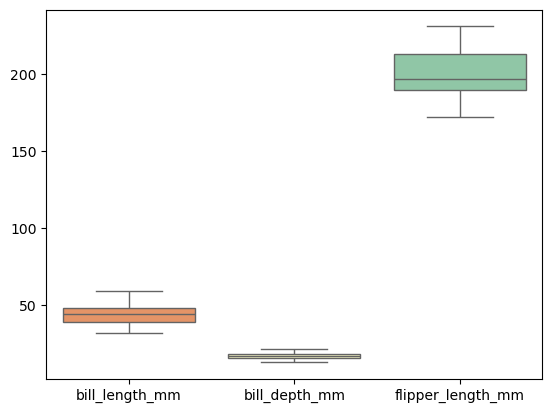

In [61]:
#visual representation of the data seperation that would skew the results
sns.boxplot(data=measures, palette ='Spectral')

In [63]:
#scaled teh data becausae as we can see above the flipper lengh is a vastly larger than the other two measurements 
scaler = StandardScaler()
measure_scaled = scaler.fit_transform(measures)
measure_scaled = pd.DataFrame(measure_scaled, columns = ['bill_length', 'bill_depth','flipper_length'])
measure_scaled

,bill_length,bill_depth,flipper_length
0,-0.896042,0.780732,-1.426752
1,-0.822788,0.119584,-1.069474
2,-0.676280,0.424729,-0.426373
3,-1.335566,1.085877,-0.569284
4,-0.859415,1.747026,-0.783651
...,...,...,...
328,2.162314,1.340165,0.431094
329,-0.090248,0.475587,0.073816
330,1.026876,0.526444,-0.569284
331,1.246638,0.933305,0.645461


<Axes: >

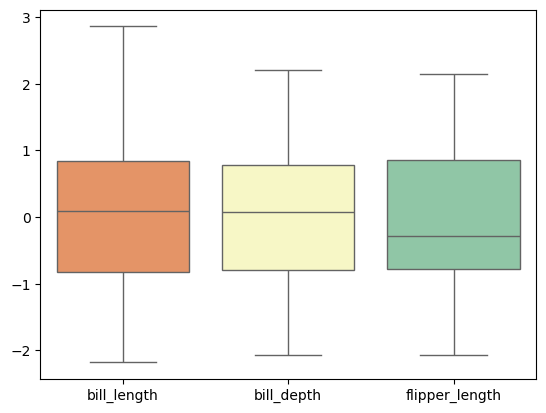

In [65]:
#now we have more uniform distribution to compare to 
sns.boxplot(data=measure_scaled, palette ='Spectral')

In [67]:
#get our species alone
species = peng_clean['species']
species

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object

C:\Users\barra\AppData\Local\Temp\ipykernel_9604\3937612312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=species, palette='deep')


<Axes: xlabel='count', ylabel='species'>

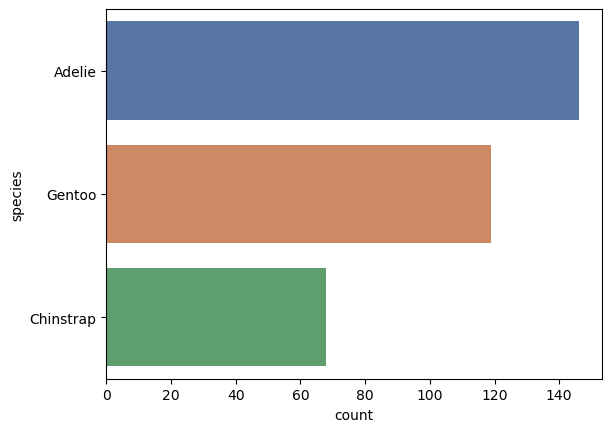

In [69]:
sns.countplot(data=species, palette='deep')

In [71]:
#create the test and training groups
X_train, X_test, y_train, y_test = train_test_split(measure_scaled, species, test_size=0.3, random_state=42)


In [73]:
#create K nearest neighbor model

knn = KNeighborsClassifier(n_neighbors = 3)

#train model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
y_pred = knn.predict(X_test)
y_pred

array(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chi

In [77]:
#accuracy of the model
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.97

In [91]:
#run loop to see if there is any difference between values of k
k = [1,2,3,4,5,6,7,8,9,200]

y_predictions=[]
for i in k:
    knns = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    ys = knn.predict(X_test)
    y_predictions.append(ys)  


In [89]:
#add accuracy values to list 
accuracy = []
for i in y_predictions:
    acc = accuracy_score(y_test,y_pred)
    accuracy.append(acc)

In [93]:
accuracy

[0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]

In [95]:
#seperate out each species into thier own data frame
adelie = peng_clean[(peng_clean['species'] == 'Adelie')]
adelie.info

<bound method DataFrame.info of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
147  Adelie      Dream            36.6           18.4              184.0   
148  Adelie      Dream            36.0           17.8              195.0   
149  Adelie      Dream            37.8           18.1              193.0   
150  Adelie      Dream            36.0           17.1              187.0   
151  Adelie      Dream            41.5           18.5              201.0   

     body_mass_g     sex  year  
0         3750.0    ma

In [97]:
chinstrap = peng_clean[(peng_clean['species'] == 'Chinstrap')]
chinstrap.info

<bound method DataFrame.info of        species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
276  Chinstrap  Dream            46.5           17.9              192.0   
277  Chinstrap  Dream            50.0           19.5              196.0   
278  Chinstrap  Dream            51.3           19.2              193.0   
279  Chinstrap  Dream            45.4           18.7              188.0   
280  Chinstrap  Dream            52.7           19.8              197.0   
..         ...    ...             ...            ...                ...   
339  Chinstrap  Dream            55.8           19.8              207.0   
340  Chinstrap  Dream            43.5           18.1              202.0   
341  Chinstrap  Dream            49.6           18.2              193.0   
342  Chinstrap  Dream            50.8           19.0              210.0   
343  Chinstrap  Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
276       3500.0  female  2007  
2

In [99]:
gentoo = peng_clean[(peng_clean['species'] == 'Gentoo')]
gentoo.info

<bound method DataFrame.info of     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
152  Gentoo  Biscoe            46.1           13.2              211.0   
153  Gentoo  Biscoe            50.0           16.3              230.0   
154  Gentoo  Biscoe            48.7           14.1              210.0   
155  Gentoo  Biscoe            50.0           15.2              218.0   
156  Gentoo  Biscoe            47.6           14.5              215.0   
..      ...     ...             ...            ...                ...   
270  Gentoo  Biscoe            47.2           13.7              214.0   
272  Gentoo  Biscoe            46.8           14.3              215.0   
273  Gentoo  Biscoe            50.4           15.7              222.0   
274  Gentoo  Biscoe            45.2           14.8              212.0   
275  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  year  
152       4500.0  female  2007  
153       5700.0    male 

In [101]:
gentoo.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

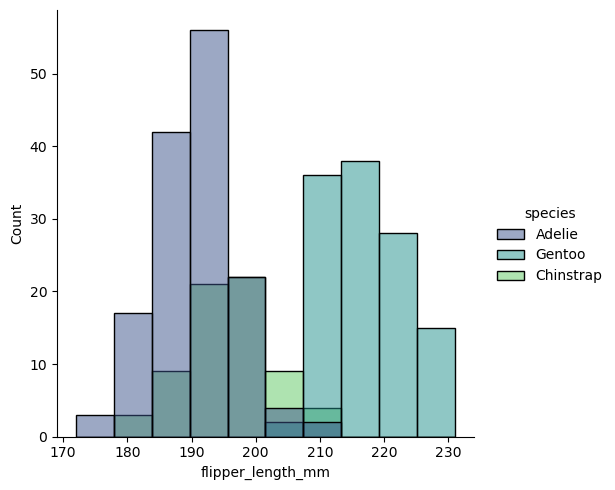

In [103]:
#flipper length
sns.displot(peng_clean, x = 'flipper_length_mm', hue='species', palette='viridis')

<Axes: ylabel='flipper_length_mm'>

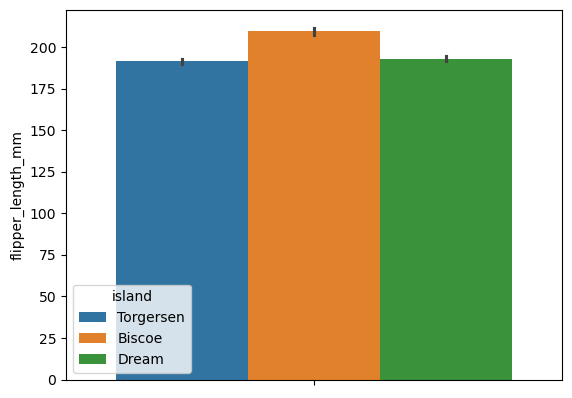

In [105]:
#finding variations in flipper lengths by island to indicate if there is a necessity for longer or shorter flippers to swim in the surrounding areas.
sns.barplot(peng_clean, y='flipper_length_mm', hue='island', orient='v' )

<Axes: xlabel='species', ylabel='flipper_length_mm'>

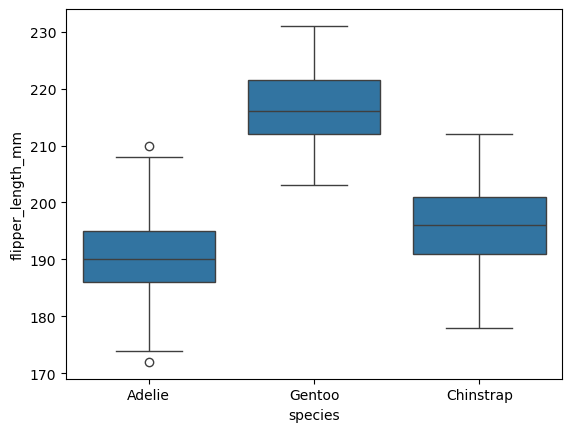

In [107]:
#this is the chart that best tells us that we have distinctive differences with 
#gento species having the majority of the flipper lengths larger than both adelie and chinstrap penguins
sns.boxplot(peng_clean, x = 'species', y='flipper_length_mm')

In [109]:
#make dictionary to hold mean and mode 
flipper_stats = {}

a = round(adelie['flipper_length_mm'].mean(),2)
g = round(gentoo['flipper_length_mm'].mean(),2)
c = round(chinstrap['flipper_length_mm'].mean(),2)

x = adelie['flipper_length_mm'].mode()
for i in x:
    x = i
y = gentoo['flipper_length_mm'].mode()
for i in y:
    y = i
z = chinstrap['flipper_length_mm'].mode()
for i in z:
    z = i


flipper_stats['adelie'] = ['mean: ' + str(a)]
flipper_stats['gentoo'] = ['mean: ' + str(g)]
flipper_stats['chinstrap'] = ['mean: ' + str(c)]

flipper_stats['adelie'].append('mode: ' + str(x))
flipper_stats['gentoo'].append('mode: ' + str(y))
flipper_stats['chinstrap'].append('mode: ' + str(z))

flipper_stats


{'adelie': ['mean: 190.1', 'mode: 190.0'],
 'gentoo': ['mean: 217.24', 'mode: 215.0'],
 'chinstrap': ['mean: 195.82', 'mode: 195.0']}

In [111]:
import scipy.stats as stats

In [113]:
#perform t test to view if there is a statistical difference between flipper length of Adelie and Gentoo Penguins
t_statistic, p_value = stats.ttest_ind(gentoo['flipper_length_mm'],adelie['flipper_length_mm'])
alpha = .05
if p_value < alpha:
    print('There is a statistical difference between flipper length of Adelie and Gentoo penguins')
    print('The p-value is: ', p_value)
else:
    print('There is NOT a statistical difference between flipper length of Adelie and Gentoo penguins')


There is a statistical difference between flipper length of Adelie and Gentoo penguins
The p-value is:  5.532793272602216e-97


In [115]:
peng_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


<Axes: xlabel='species', ylabel='body_mass_g'>

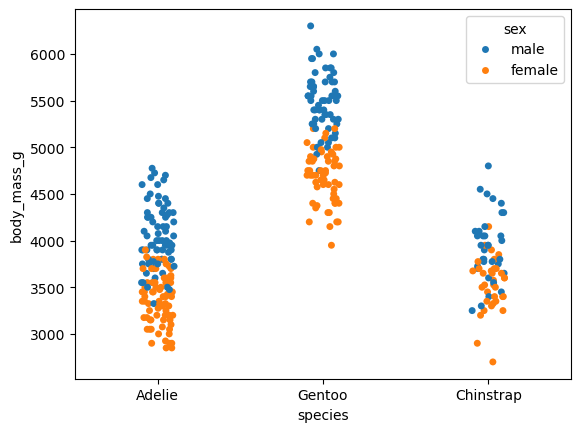

In [125]:
#strip plot to show mass of penguins by species and sex
sns.stripplot(peng_clean, x = 'species', y ='body_mass_g', hue = 'sex') 

In [147]:
adelie['sex'] = adelie['sex'].replace('male', 1)
adelie['sex'] = adelie['sex'].replace('female',0)
adelie

C:\Users\barra\AppData\Local\Temp\ipykernel_9604\4019171719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adelie['sex'] = adelie['sex'].replace('male', 1)
C:\Users\barra\AppData\Local\Temp\ipykernel_9604\4019171719.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adelie['sex'] = adelie['sex'].replace('female',0)
C:\Users\barra\AppData\Local\Temp\ipykernel_9604\4019171719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,2007
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,0,2009
148,Adelie,Dream,36.0,17.8,195.0,3450.0,0,2009
149,Adelie,Dream,37.8,18.1,193.0,3750.0,1,2009
150,Adelie,Dream,36.0,17.1,187.0,3700.0,0,2009


In [151]:
t_statistic, p_value = stats.ttest_ind(adelie['body_mass_g'],adelie['sex'])
alpha = .05
if p_value < alpha:
    print('There is a statistical difference between the weights and sex of Adelie penguins')
    print('The p-value is: ', p_value)
else:
    print('There is NOT a statistical difference between sex of Adelie penguins')

There is a statistical difference between the weights and sex of Adelie penguins
The p-value is:  7.183907482875406e-224


[Text(0.5, 1.0, 'Adelie')]

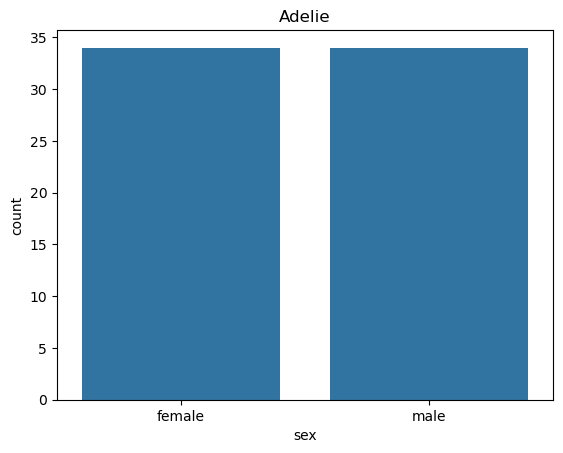

In [191]:
#visually show the number of males and females of adelie
sns.countplot(chinstrap,x='sex').set(title = 'Adelie')

In [169]:
#verify the number
adelie['sex'].value_counts()

sex
1    73
0    73
Name: count, dtype: int64

[Text(0.5, 1.0, 'Gentoo')]

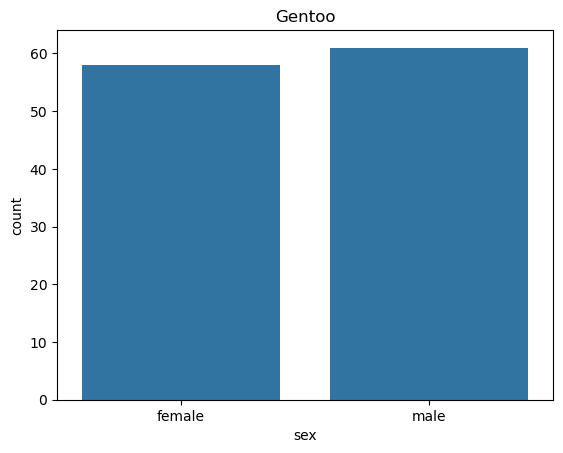

In [187]:
sns.countplot(gentoo,x='sex').set(title = 'Gentoo')

[Text(0.5, 1.0, 'Chinstrap')]

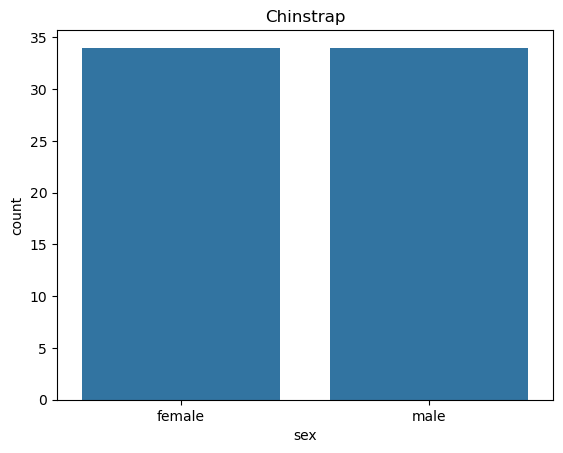

In [189]:
sns.countplot(chinstrap,x='sex').set(title = 'Chinstrap')

Can tell we have the most data coming from adelie and the lease coming from chinstraps

<Axes: ylabel='bill_length_mm'>

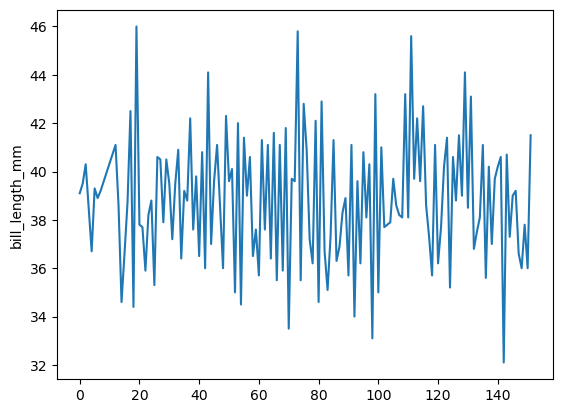

In [198]:
sns.lineplot(adelie['bill_length_mm'])